In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

from matplotlib.cm import ScalarMappable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Filter away useless warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading dataset

In [2]:
penguins = pd.read_csv('https://datasets.holoviz.org/penguins/v1/penguins.csv')
penguins = penguins[~penguins.sex.isnull()].reset_index().sort_values('species')

penguins.head(5)

,index,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
94,100,Adelie,Biscoe,35.0,17.9,192.0,3725.0,female,2009
95,101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,male,2009
96,102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,female,2009
97,103,Adelie,Biscoe,37.8,20.0,190.0,4250.0,male,2009


# Standard plots

<Axes: xlabel='body_mass_g', ylabel='sex'>

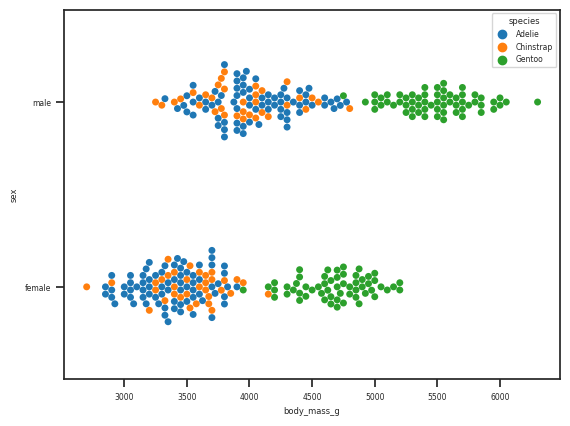

In [3]:
sns.set_style("ticks")
sns.set_context("notebook", font_scale=.5, rc={"lines.linewidth": 2.5})

sns.swarmplot(data=penguins, x="body_mass_g", y="sex", hue="species")

<Axes: xlabel='species', ylabel='flipper_length_mm'>

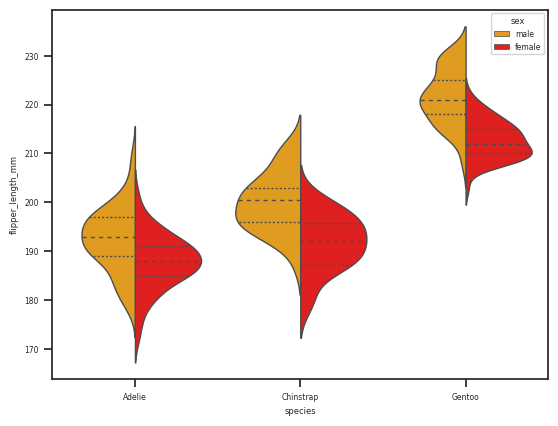

In [4]:
sns.violinplot(data=penguins, y="flipper_length_mm", x='species', hue='sex', split=True, inner="quart", linewidth=1,
               palette={"male": "orange", "female": "red"})

# Dataframe for ridgeline

In [5]:
penguins_df = penguins[['flipper_length_mm', 'species', 'sex']]
penguins_df['species'] = penguins.agg(lambda x: f"{x['species']} {x['sex']}", axis=1)
penguins_df = penguins_df.drop(['sex'], axis='columns')
penguins_df.head(5)

,flipper_length_mm,species
0,181.0,Adelie male
94,192.0,Adelie female
95,203.0,Adelie male
96,183.0,Adelie female
97,190.0,Adelie male


In [6]:
# Dictionary for Y labels
label_dict = {1: 'Adelie - Male',
              2: 'Adelie - Female',
              3: 'Chinstrap - Male',
              4: 'Chinstrap - Female',
              5: 'Gentoo - Male',
              6: 'Gentoo - Female'}

Text(0.5, 0.98, 'Central Tendency Of Flipper Length')

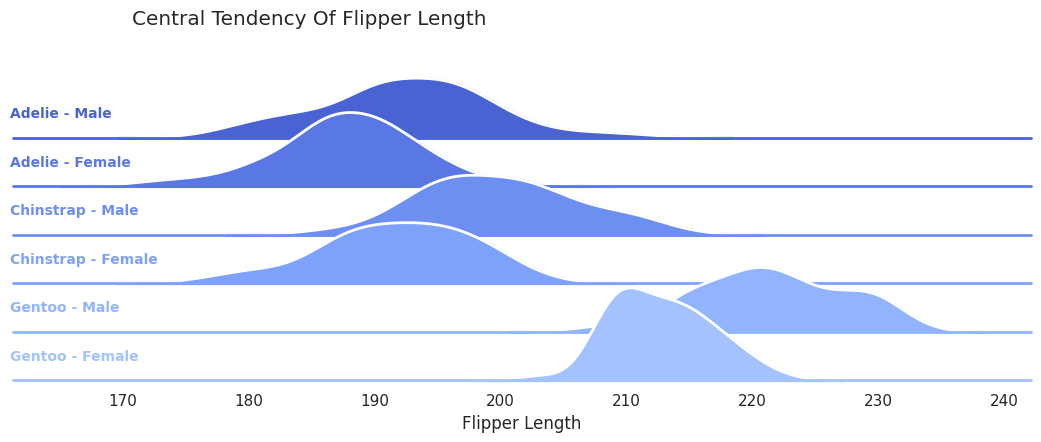

In [7]:
# Setting the color theme
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})

# Generate a color palette with Seaborn.color_palette()
pal = sns.color_palette('coolwarm', n_colors=18)

# sns.FacetGrid class - create a plot for each value in 'species' column
# Making the charts broader and shorter 
# The 'hue' argument is the one that will be represented by colors with 'palette'
ridge = sns.FacetGrid(penguins_df, row='species', hue="species", aspect=15, height=.75, palette=pal)

# map_dataframe - to color fill all the subplots
ridge.map_dataframe(sns.kdeplot, x='flipper_length_mm', bw_adjust=1, clip_on=False, fill=True, alpha=1, linewidth=2)

# Add a white line that represents the contour of each kdeplot    
ridge.map_dataframe(sns.kdeplot, x='flipper_length_mm', bw_adjust=1, clip_on=False, color="white", linewidth=2)

# Add a horizontal line for each plot
ridge.map_dataframe(plt.axhline, y=0, linewidth=2, clip_on=False)

# Loop over the FacetGrid figure axes (g.axes.flat) and add the "values" from label_dict as text with the right color
# ax.lines[-1].get_color() enables access the last line's color in each axes
for i, ax in enumerate(ridge.axes.flat):
    ax.text(161, 0.02, label_dict[i+1],
            fontweight='bold', fontsize=10,
            color=ax.lines[-1].get_color())

# Remove clutter
ridge.set_titles("")
ridge.set(yticks=[], ylabel="", xlabel="Flipper Length")
ridge.despine(bottom=True, left=True)

# subplots_adjust to control the height space between the subplots.
ridge.fig.subplots_adjust(hspace=-.5)
plt.suptitle('Central Tendency Of Flipper Length', ha='right')

# Dataframe for circular barplot

In [8]:
bill_df = penguins.groupby([ 'island', 'species', 'sex'], as_index=False).agg({'bill_length_mm': 'mean', 'bill_depth_mm': 'mean'}, ascending=False)

# Concatenate string values from 'species' column and first letter of string values from 'sex' column
bill_df['species'] = bill_df.agg(lambda x: f"{x['species']} ({x['sex'][0]})", axis=1)
final_bill_df = bill_df.drop('sex', axis='columns')
final_bill_df

,island,species,bill_length_mm,bill_depth_mm
0,Biscoe,Adelie (f),37.359091,17.704545
1,Biscoe,Adelie (m),40.590909,19.036364
2,Biscoe,Gentoo (f),45.563793,14.237931
3,Biscoe,Gentoo (m),49.473770,15.718033
4,Dream,Adelie (f),36.911111,17.618519
5,Dream,Adelie (m),40.071429,18.839286
6,Dream,Chinstrap (f),46.573529,17.588235
7,Dream,Chinstrap (m),51.094118,19.252941
8,Torgersen,Adelie (f),37.554167,17.550000
9,Torgersen,Adelie (m),40.586957,19.391304


In [9]:
# Values for the x axis - space between bars
ANGLES = np.linspace(0.40, 2 * np.pi - 0.10, 10, endpoint=False)

# Average length and depth
LENGTHS = final_bill_df["bill_length_mm"]
DEPTHS = final_bill_df["bill_depth_mm"]

# Species and Sex label
CATEGORIES = final_bill_df['species']

# Grab the group values
GROUP = final_bill_df["island"].values

Text(0.1, 0.83, 'Average Penguin Bill Length (BAR) And Depth (DOT)')

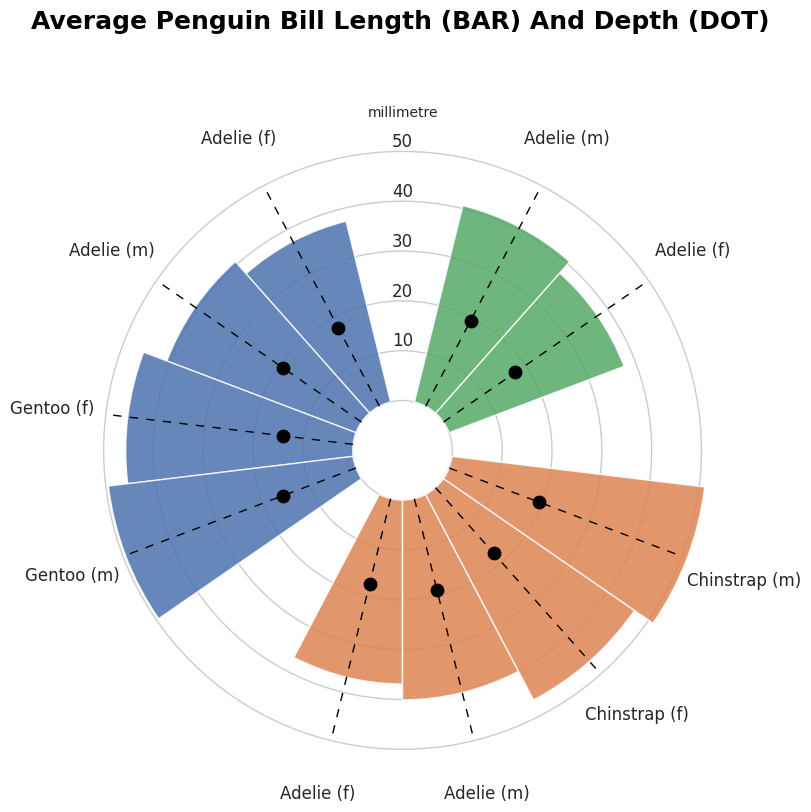

In [10]:
# Add empty bars (PAD) to the end of each group
PAD = 1
ANGLES_N = len(LENGTHS) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtain size of each group to create color groups
GROUPS_SIZE = [len(i[1]) for i in final_bill_df.groupby("island")]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# Obtaining the right indexes
offset = 0
IDXS = []
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2.4)
ax.set_ylim(-10, 60)

# Add geometries to the plot - zorder to manipulate which geometries are on top
# Add bars to represent average bill length
ax.bar(ANGLES[IDXS], LENGTHS, color=COLORS, alpha=0.85, width=WIDTH, zorder=10)

# Add dotted lines. These are just references
ax.vlines(ANGLES[IDXS], 0, 50, color="black", ls=(0, (6, 6)), linewidth=1, zorder=11)

# Add dots to represent the bill depth
ax.scatter(ANGLES[IDXS], DEPTHS, s=80, color='black', zorder=11)

# Remove lines for polar axis (x)
ax.xaxis.grid(False)
# Lines for axis y
ax.yaxis.grid(True)

# Add labels for bars
CATEGORIES = [r for r in CATEGORIES]
CATEGORIES

# Set the labels
ax.set_xticks(ANGLES[IDXS])
ax.set_xticklabels(CATEGORIES, size=12)

# Put grid lines for radial axis (y) at 0, 10, 20, 30, 40, 50
ax.set_yticklabels([])
ax.set_yticks([0, 10, 20, 30, 40, 50])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")

# Adjust padding of the x axis labels
XTICKS = ax.xaxis.get_major_ticks()
i = 0
for tick in XTICKS:
    if i != 7:
        tick.set_pad(-10)
    else:
        tick.set_pad(-1)
    i += 1
# Add custom annotations
# The following represent the heights in the values of the y axis
PAD = 1
ax.text(0 * np.pi / 2, 10 + PAD, "10", ha="center", size=12)
ax.text(0 * np.pi / 2, 20 + PAD, "20", ha="center", size=12)
ax.text(0 * np.pi / 2, 30 + PAD, "30", ha="center", size=12)
ax.text(0 * np.pi / 2, 40 + PAD, "40", ha="center", size=12)
ax.text(0 * np.pi / 2, 50 + PAD, "50", ha="center", size=12)
ax.text(0 * np.pi / 2, 56 + PAD, "millimetre", ha="center", size=10)

title = "Average Penguin Bill Length (BAR) And Depth (DOT)"
fig.text(0.1, 0.83, title, fontsize=18, color="black", weight="bold", ha="left", va="baseline")

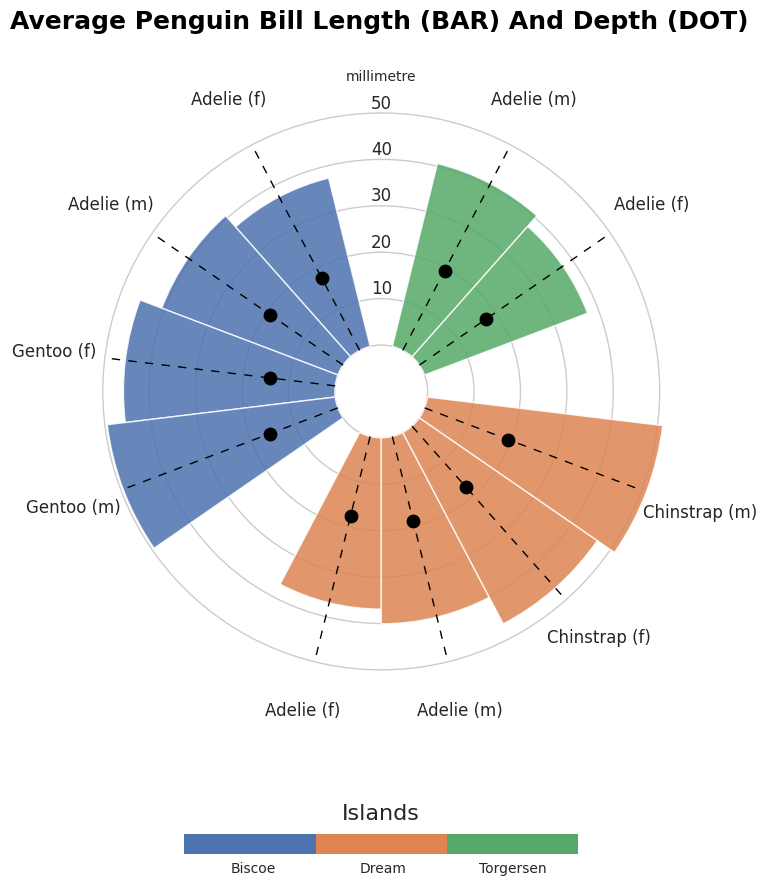

In [11]:
# Colormap
colorbar_cmap = mpl.colors.LinearSegmentedColormap.from_list("color", COLORS, N=256)

# Add legend -----------------------------------------------------

# First, make some room for the legend and the caption in the bottom.
fig.subplots_adjust(top=0.8)
fig.subplots_adjust(bottom=0.175)

# Create a new norm, which is discrete
bounds = [0, 1, 2, 3]
norm = mpl.colors.BoundaryNorm(bounds, colorbar_cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=colorbar_cmap),
    orientation = "horizontal", 
    fraction=0.025
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("Islands", size=16, labelpad=-40)
cb.set_ticks(ticks=bounds, labels=["", '', '', ''])

fig.text(0.370, 0.16, "Biscoe", fontsize=10, ha="center", va="baseline")
fig.text(0.515, 0.16, "Dream", fontsize=10, ha="center", va="baseline")
fig.text(0.659, 0.16, "Torgersen", fontsize=10, ha="center", va="baseline")

fig